# WINE QUALTIY ANALYSIS- iNeuron Internship Project

## Presented by SHRUTI KHANDELWAL

### Dataset Information

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009],

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Datasets downloaded from : https://archive.ics.uci.edu/ml/datasets/wine+quality

### Attribute Information:



Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##### Total number of rows and columns

In [3]:
df.shape

(6497, 13)

##### Complete information about dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

##### Checking for duplicates

In [7]:
df.duplicated().sum()

1168

##### Removing duplicates

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

0

In [10]:
#After dropping duplicate values, our dataset has rows and columns : 
df.shape

(5329, 13)

In [11]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##### Checking for null values

In [12]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

##### Filling out null values

In [13]:
#Filling null values with mean/median
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].median())
df['fixed acidity'].isnull().sum()

0

In [14]:
df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)
df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)
df['chlorides'].fillna(df['chlorides'].median(), inplace=True)
df['pH'].fillna(df['pH'].mean(), inplace=True)
df['sulphates'].fillna(df['sulphates'].median(), inplace=True)
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Statistical information analysis

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000
mean,7.216166,0.344123,0.318738,5.053839,0.056665,30.060143,114.189341,0.994536,3.224434,0.533250,10.548539,5.796022
std,1.317988,0.168102,0.147075,4.503160,0.036838,17.815588,56.781422,0.002966,0.160140,0.149669,1.186134,0.879922
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,75.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994640,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Some outliers can be seen in the statistical analysis, let's plot them and seen in details.


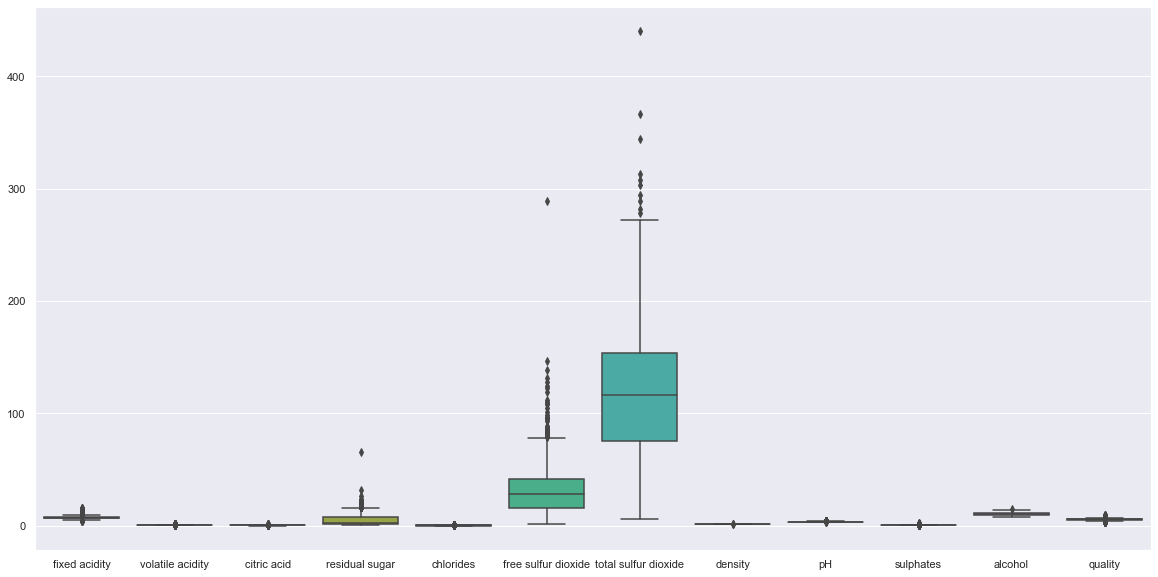

In [16]:
sns.set(rc = {'figure.figsize' : (20,10)})
sns.boxplot(data=df)
plt.show()

Outliers can be seen in 3 columns: residual sugar, free sulfur dioxide, total sulfur dioxide. Let's remove them.

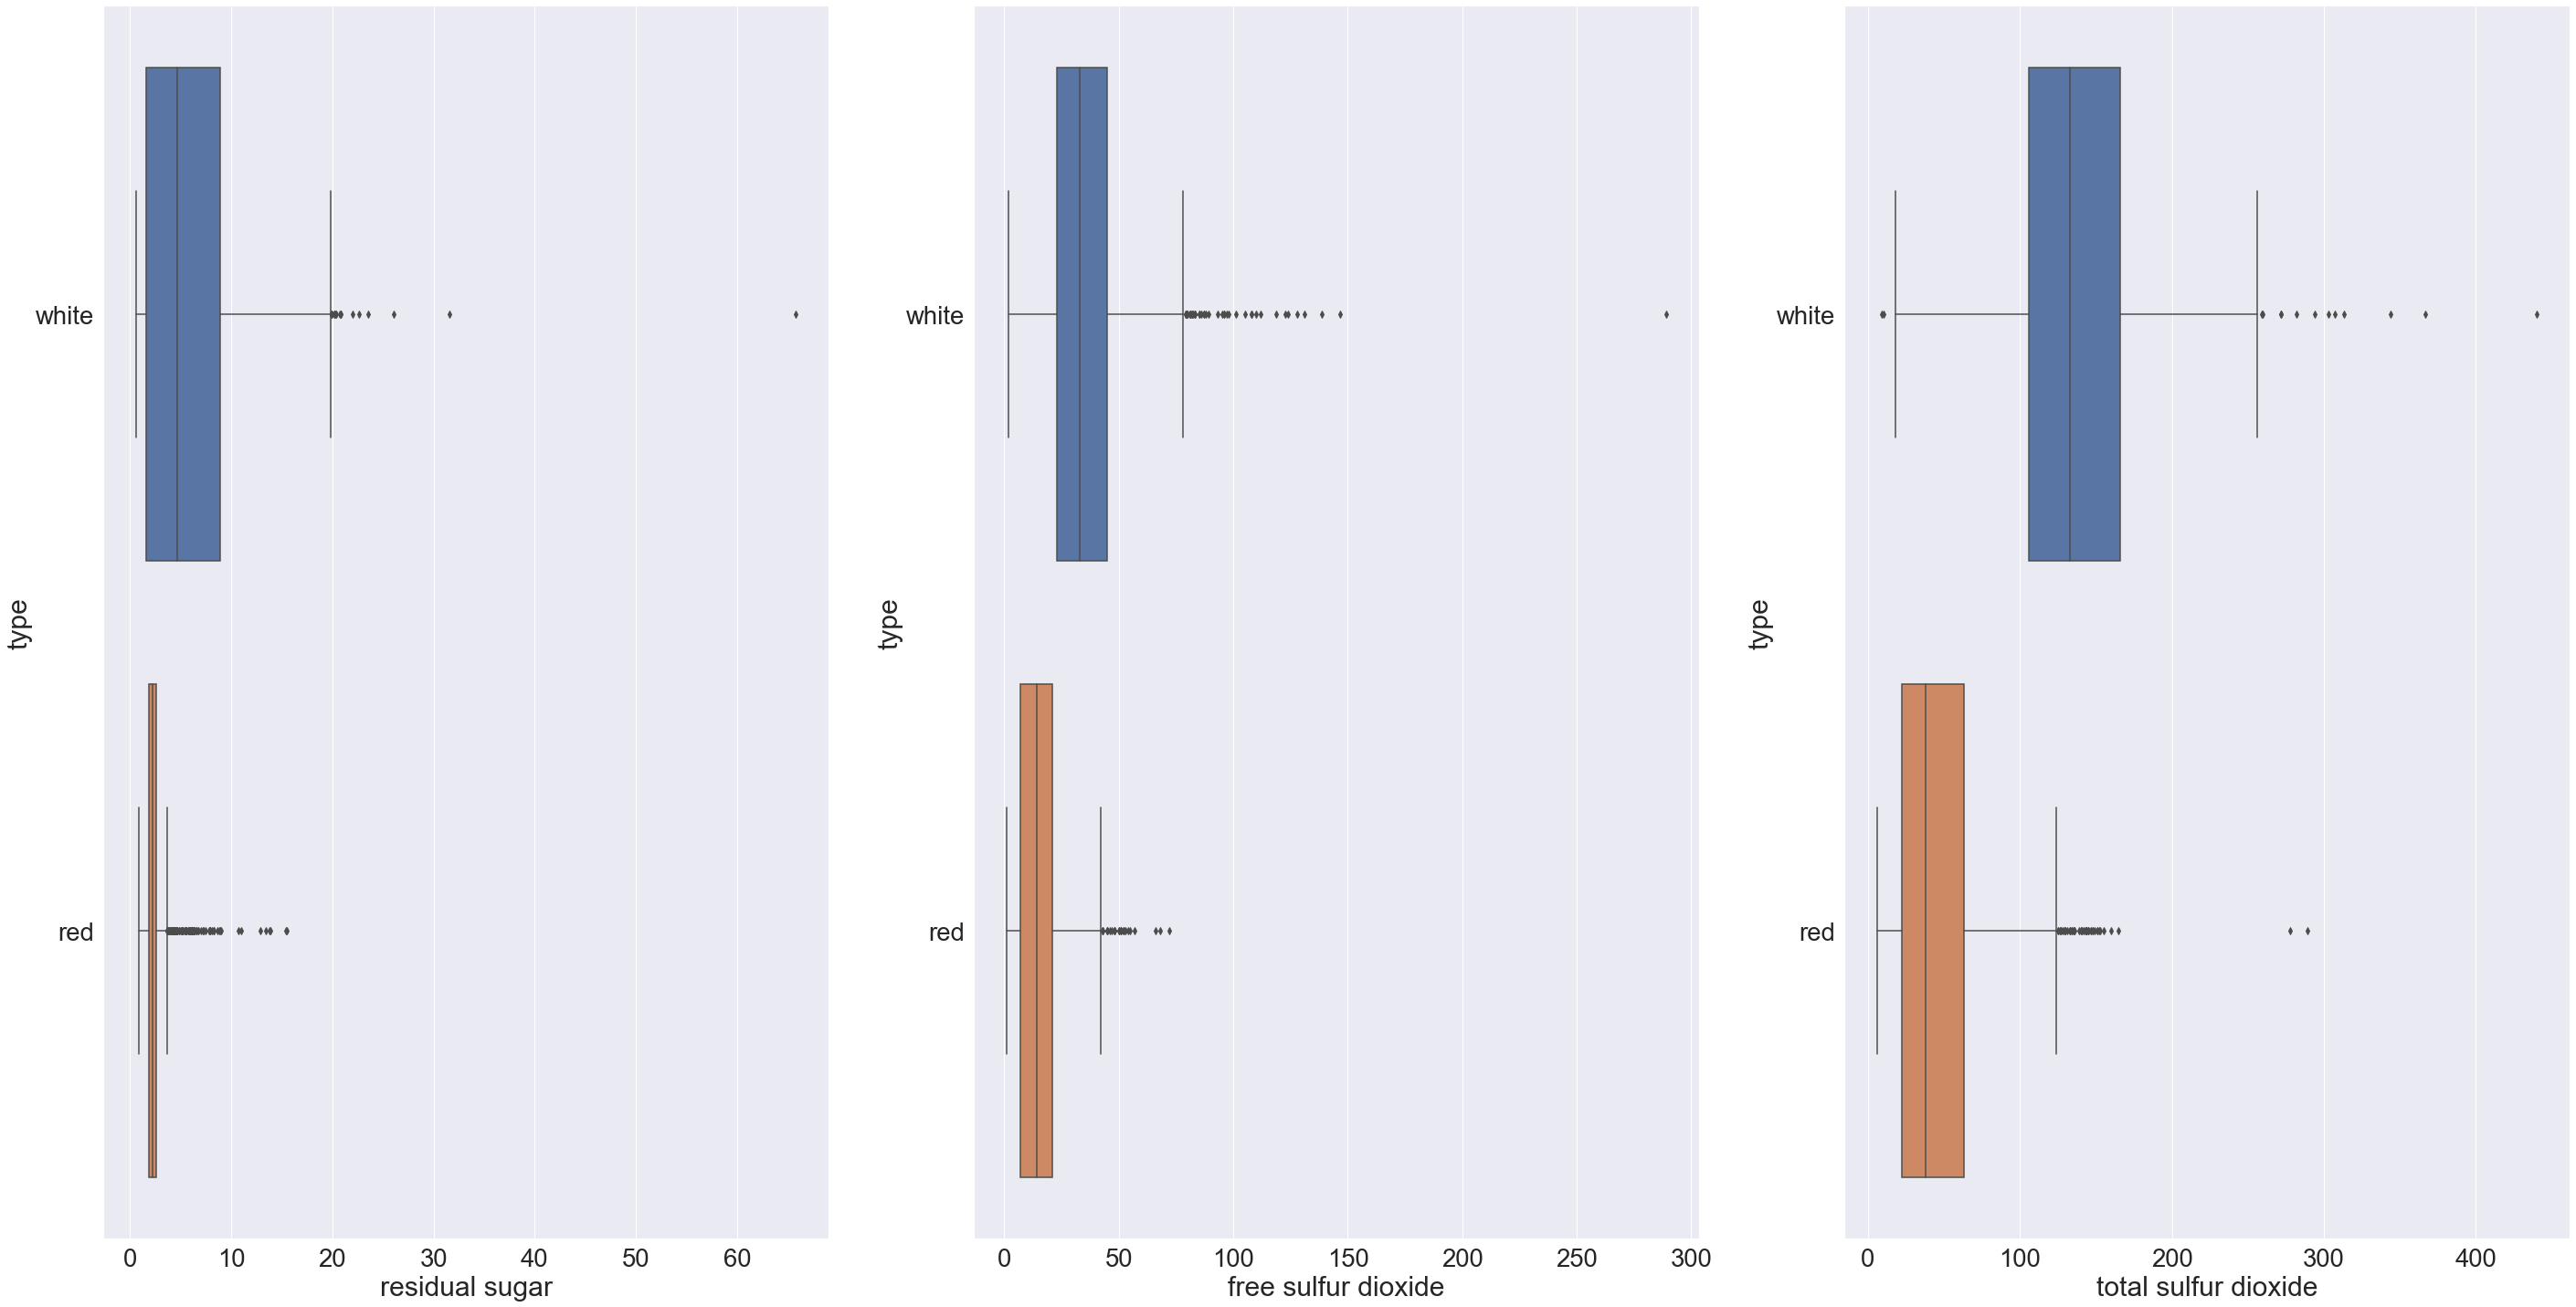

In [17]:
sns.set(font_scale = 2.5)
fig, ax =plt.subplots(1,3)
sns.boxplot(df['residual sugar'], df['type'], ax=ax[0])
sns.boxplot(df['free sulfur dioxide'], df['type'], ax=ax[1])
sns.boxplot(df['total sulfur dioxide'], df['type'], ax=ax[2])
plt.subplots_adjust(right = 2, top = 2)
plt.show()

In [18]:
#Removing outliers in free sulfur dioxide
lower = df['free sulfur dioxide'].mean()-3*df['free sulfur dioxide'].std()
upper = df['free sulfur dioxide'].mean()+3*df['free sulfur dioxide'].std()
df = df[(df['free sulfur dioxide']>lower) & (df['free sulfur dioxide']<upper)]

#Removing outliers in total sulfur dioxide
lower = df['total sulfur dioxide'].mean()-3*df['total sulfur dioxide'].std()
upper = df['total sulfur dioxide'].mean()+3*df['total sulfur dioxide'].std()
df = df[(df['total sulfur dioxide']>lower) & (df['total sulfur dioxide']<upper)]

#Removing outliers in residual sugar
lower = df['residual sugar'].mean()-3*df['residual sugar'].std()
upper = df['residual sugar'].mean()+3*df['residual sugar'].std()
df = df[(df['residual sugar']>lower) & (df['residual sugar']<upper)]

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000,5255.000000
mean,7.219914,0.344893,0.317961,4.917547,0.056783,29.522931,113.038535,0.994486,3.225557,0.533705,10.556159,5.800571
std,1.322397,0.168608,0.145936,4.227824,0.037040,16.615659,55.848559,0.002868,0.159673,0.149956,1.184002,0.876999
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.120000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,115.000000,0.994600,3.220000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.400000,0.066500,40.000000,152.000000,0.996700,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,18.500000,0.611000,83.000000,282.000000,1.003690,4.010000,2.000000,14.900000,9.000000


### One hot encoding

In [20]:
dum = pd.get_dummies(df.type, drop_first = True)
df = pd.concat([df, dum], axis = 1)
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
4036,white,7.3,0.33,0.22,1.4,0.041,40.0,177.0,0.99287,3.14,0.48,9.9,5,1
5015,red,7.8,0.56,0.12,2.0,0.082,7.0,28.0,0.99700,3.37,0.50,9.4,6,0
3005,white,6.9,0.30,0.36,0.9,0.037,40.0,156.0,0.98968,3.08,0.36,12.1,6,1
3617,white,7.0,0.29,0.33,0.9,0.041,20.0,117.0,0.99048,3.21,0.50,11.4,5,1
4057,white,6.6,0.17,0.36,1.9,0.036,38.0,110.0,0.99056,3.05,0.54,11.4,6,1


In [21]:
df.drop('type', axis =1 , inplace = True)

In [22]:
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
6347,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8,0
1200,6.8,0.180,0.37,1.5,0.027,37.0,93.0,0.99200,3.30,0.45,10.8,6,1
1492,8.0,0.300,0.49,9.4,0.046,47.0,188.0,0.99640,3.14,0.48,10.0,5,1
2408,7.5,0.705,0.10,13.0,0.044,44.0,214.0,0.99741,3.10,0.50,9.1,5,1
6242,11.5,0.420,0.48,2.6,0.077,8.0,20.0,0.99852,3.09,0.53,11.0,5,0
3242,7.0,0.290,0.35,1.4,0.036,42.0,109.0,0.99119,3.31,0.62,11.6,6,1
5352,7.0,0.230,0.40,1.6,0.063,21.0,67.0,0.99520,3.50,0.63,11.1,5,0
5277,8.3,0.420,0.38,2.5,0.094,24.0,60.0,0.99790,3.31,0.70,10.8,6,0
5968,9.3,0.330,0.45,1.5,0.057,19.0,37.0,0.99498,3.18,0.89,11.1,7,0
5204,7.6,0.620,0.32,2.2,0.082,7.0,54.0,0.99660,3.36,0.52,9.4,5,0


Now 0 represents red wine, 1 represents white wine.

### EDA

##### Univariate Analysis

In [23]:
print("Min quality unit is ", df.quality.min())
print("Max quality unit is ", df.quality.max())
print(df.quality.value_counts())

Min quality unit is  3
Max quality unit is  9
6    2298
5    1725
7     851
4     204
8     147
3      25
9       5
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

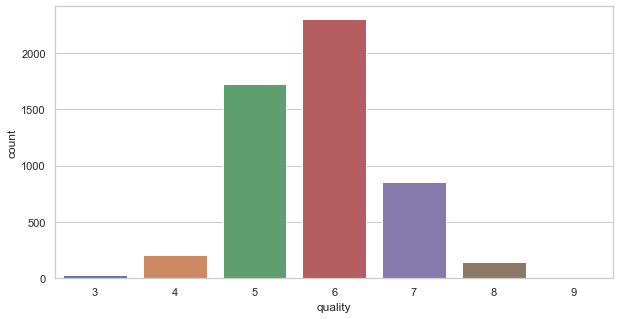

In [24]:
sns.set(font_scale = 2)
sns.set(rc ={'figure.figsize': (10,5)})
sns.set_theme(style="whitegrid")
sns.countplot(df['quality'])

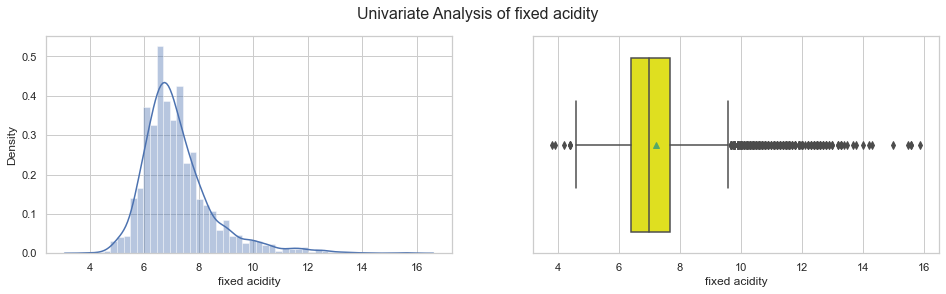

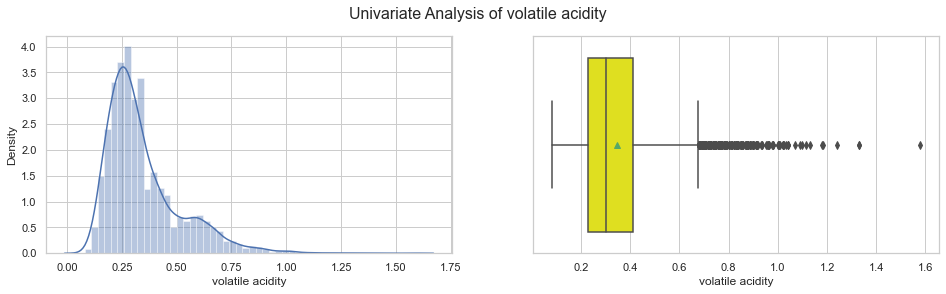

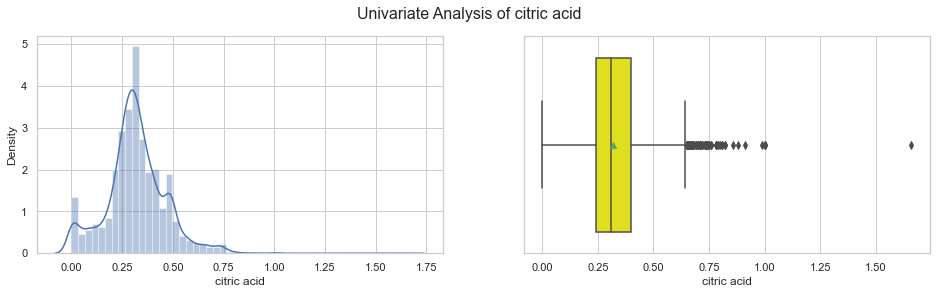

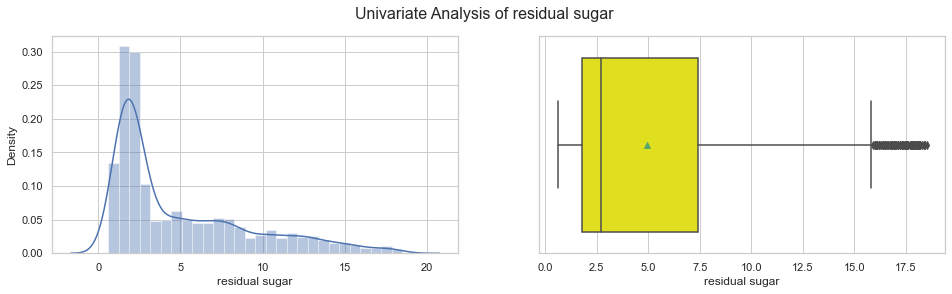

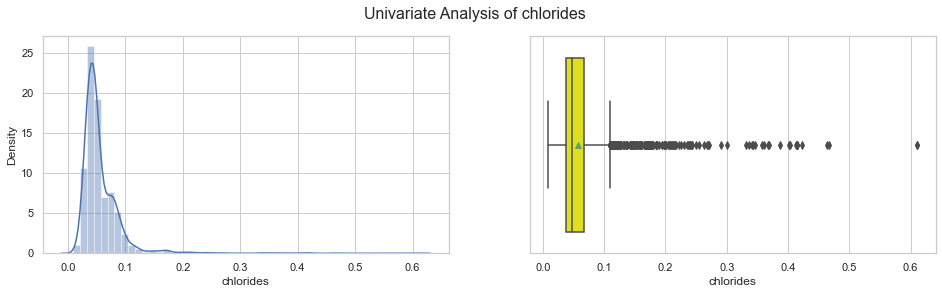

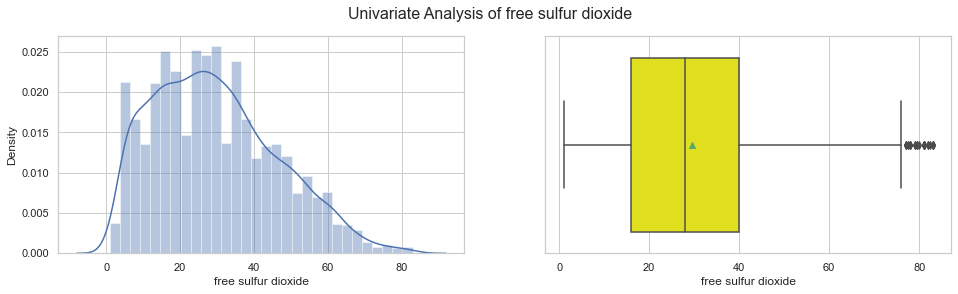

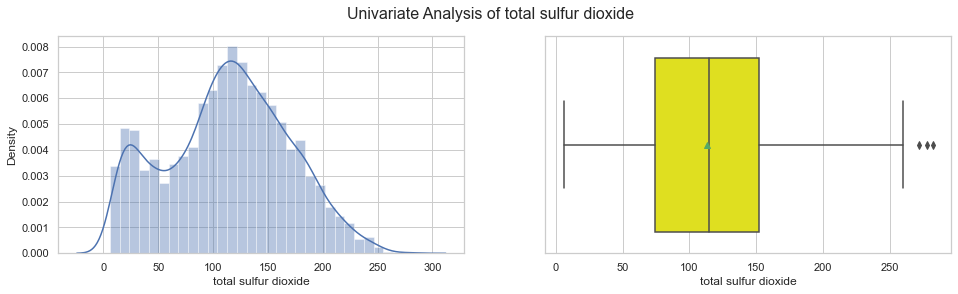

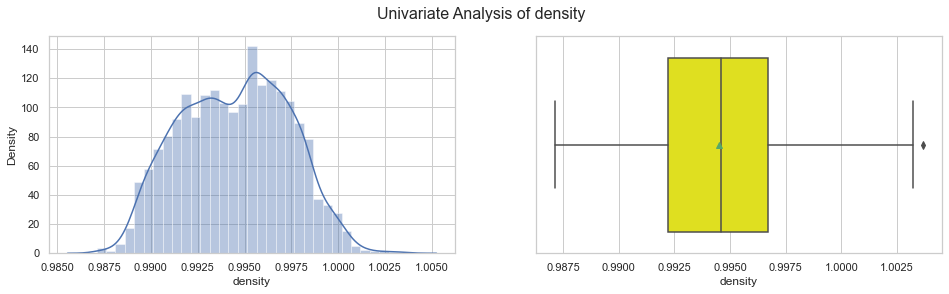

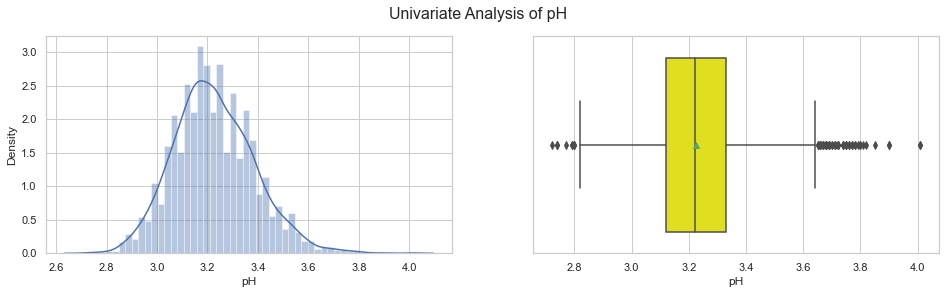

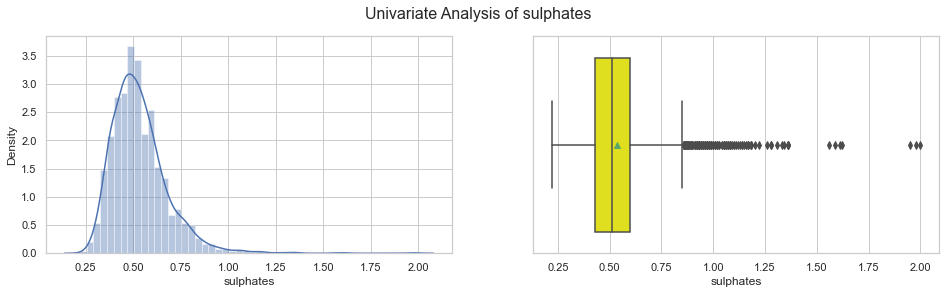

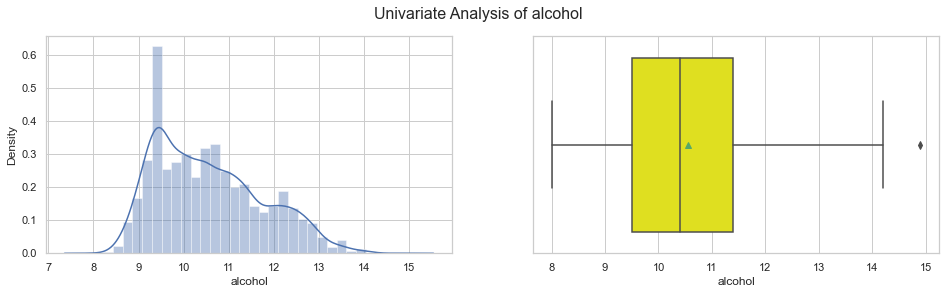

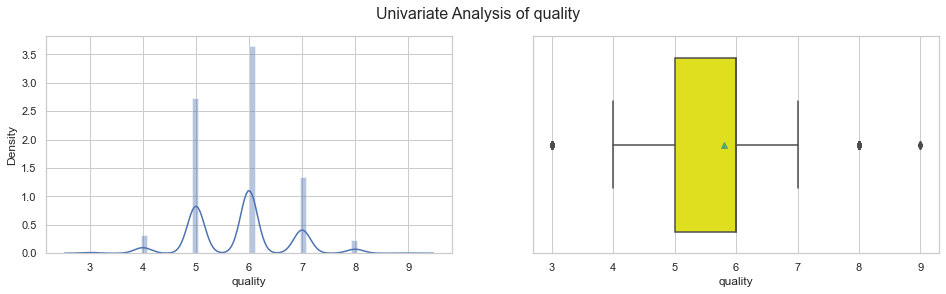

In [25]:
col_x = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
for x in col_x:
    fig, axes = plt.subplots(1, 2, figsize=(16,4))
    sns.distplot(df[x], ax=axes[0])
    sns.boxplot(df[x], ax=axes[1], orient = "h", showmeans = True, color = "yellow")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)
    

In [26]:
df['residual sugar'] = np.log(1 + df['residual sugar'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

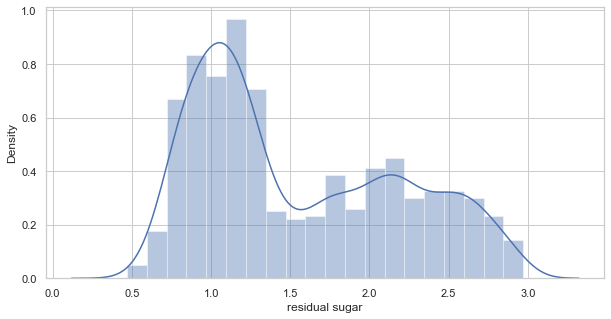

In [27]:
sns.distplot(df['residual sugar'])

<AxesSubplot:xlabel='residual sugar'>

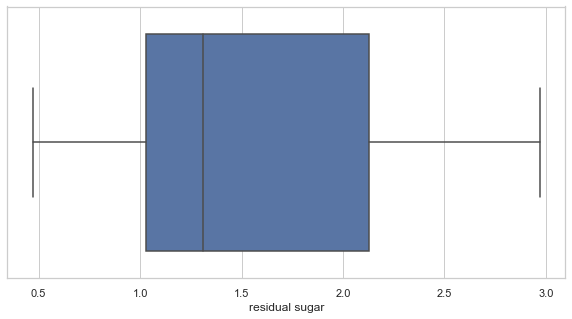

In [28]:
sns.boxplot(df['residual sugar'])

##### Bivariate Analysis

Relationship between Fixed Acidity and Quality.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

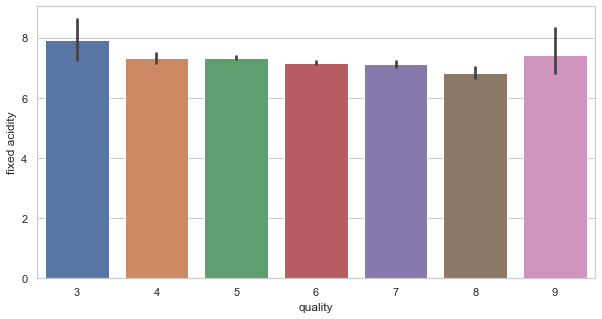

In [29]:
sns.barplot(x = df['quality'], y=df['fixed acidity'])

Relationship between Volatile Acidity and Quality.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

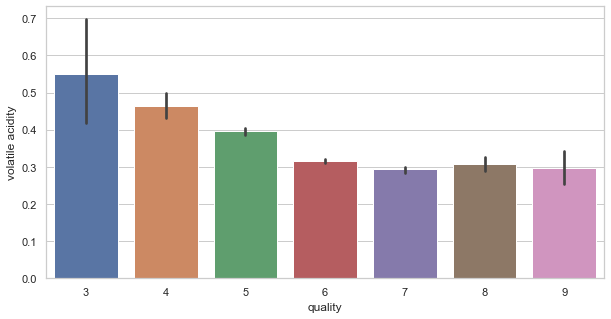

In [30]:
sns.barplot(x = df['quality'], y=df['volatile acidity'])

Relationship between Alcohol and Quality.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

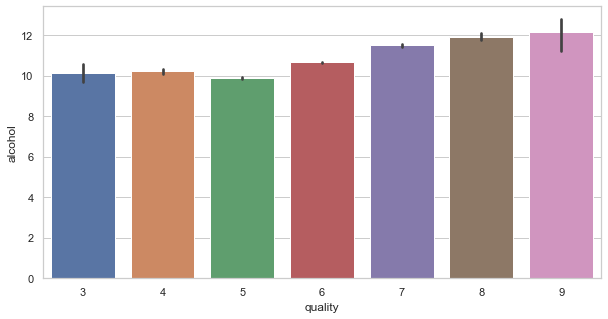

In [31]:
sns.barplot(x = df['quality'], y=df['alcohol'])

Relationship between Citric Acid and Quality.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

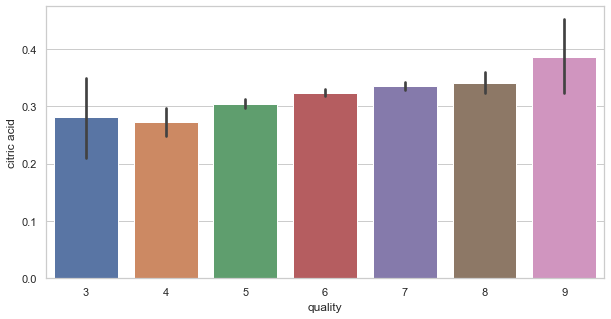

In [32]:
sns.barplot(x = df['quality'], y=df['citric acid'])

Relationship between Chlorides and Quality.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

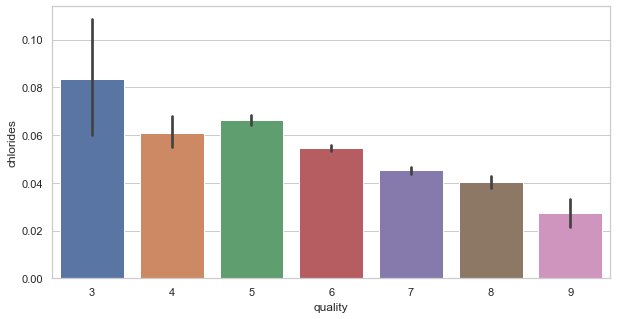

In [33]:
sns.barplot(x = df['quality'], y=df['chlorides'])

Relationship between Total Sulfur Dioxide and Quality.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

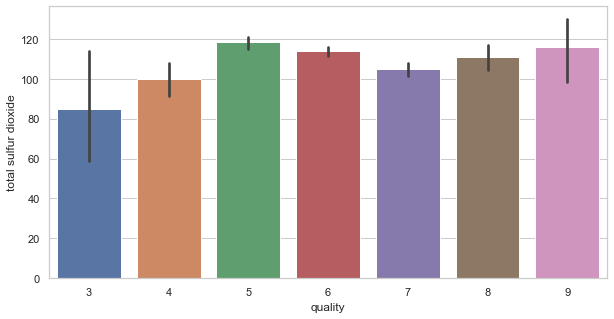

In [34]:
sns.barplot(x = df['quality'], y=df['total sulfur dioxide'])

Relationship between Free Sulfur Dioxide and Quality.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

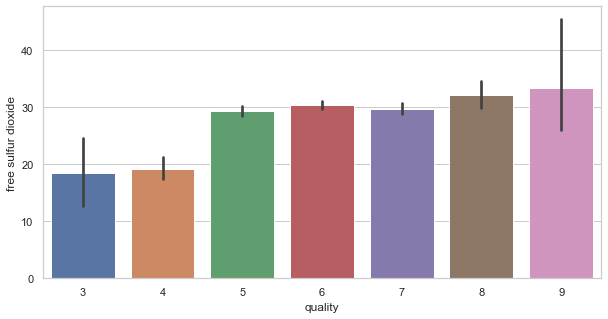

In [35]:
sns.barplot(x = df['quality'], y=df['free sulfur dioxide'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
fixed acidity,1.000000,0.214020,0.331274,-0.096740,0.289761,-0.293157,-0.335112,0.497247,-0.270410,0.309030,-0.105752,-0.080027,-0.487487
volatile acidity,0.214020,1.000000,-0.392012,-0.146930,0.367744,-0.360929,-0.405910,0.313700,0.245704,0.227022,-0.070302,-0.267713,-0.646091
citric acid,0.331274,-0.392012,1.000000,0.123624,0.057461,0.147954,0.194285,0.088670,-0.347515,0.063409,-0.010869,0.099823,0.184851
residual sugar,-0.096740,-0.146930,0.123624,1.000000,-0.119801,0.424853,0.487999,0.464491,-0.215395,-0.167355,-0.269365,-0.030409,0.309430
chlorides,0.289761,0.367744,0.057461,-0.119801,1.000000,-0.192708,-0.272722,0.387678,0.024857,0.406489,-0.272532,-0.204557,-0.499987
free sulfur dioxide,-0.293157,-0.360929,0.147954,0.424853,-0.192708,1.000000,0.727263,0.001980,-0.151757,-0.213893,-0.172766,0.084868,0.484841
total sulfur dioxide,-0.335112,-0.405910,0.194285,0.487999,-0.272722,0.727263,1.000000,-0.012588,-0.221548,-0.280793,-0.247469,-0.036270,0.701815
density,0.497247,0.313700,0.088670,0.464491,0.387678,0.001980,-0.012588,1.000000,0.046776,0.300950,-0.687014,-0.336993,-0.458098
pH,-0.270410,0.245704,-0.347515,-0.215395,0.024857,-0.151757,-0.221548,0.046776,1.000000,0.162613,0.092755,0.038572,-0.310693
sulphates,0.309030,0.227022,0.063409,-0.167355,0.406489,-0.213893,-0.280793,0.300950,0.162613,1.000000,-0.021841,0.038139,-0.491362


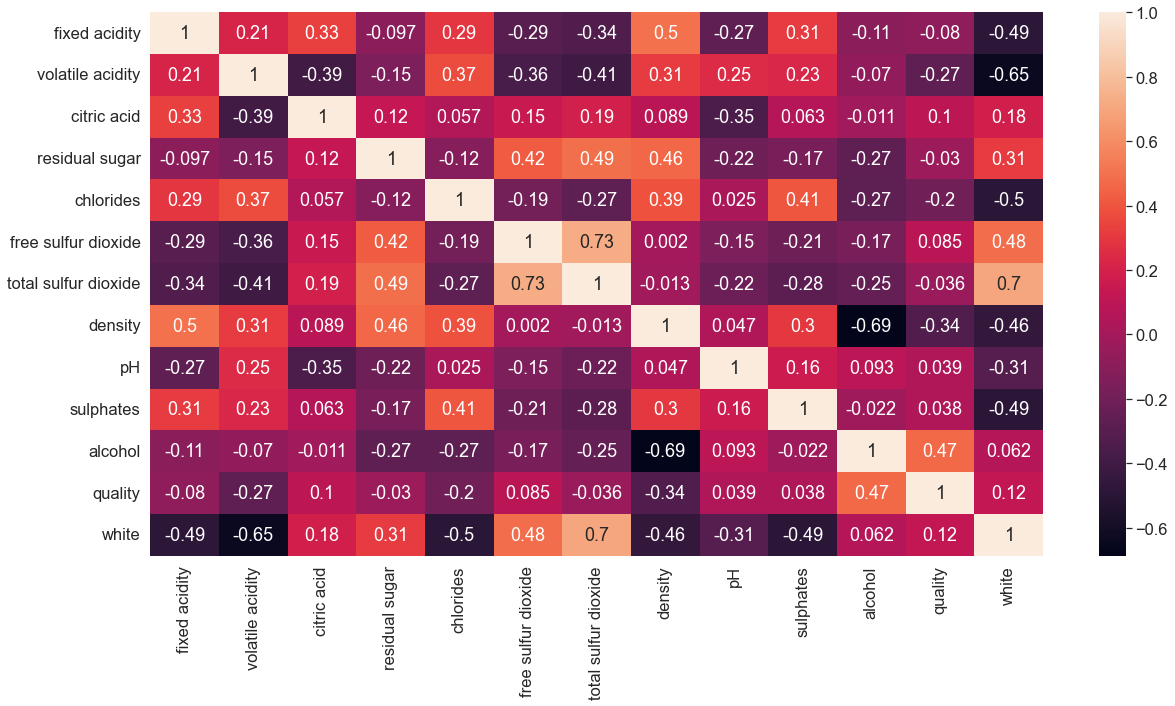

In [36]:
#finding relationship between features
corr= df.corr()
sns.set(font_scale = 1.5)
plt.figure(figsize=(20,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
corr

#### Mapping values for target variable

In [37]:
df['quality']=df['quality'].map({3:'low', 4:'low', 5:'medium', 6:'medium', 7:'medium', 8:'high', 9:'high'})
df['quality']=df['quality'].map({'low':0,'medium':1,'high':2})

## Model Development

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [39]:
X = df.drop(['quality','white'], axis=1)
y = df['quality'].apply(lambda y_value: 1 if y_value>= 1 else 0)

In [40]:
print(X.head())
print(X.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            6.3              0.30         0.34        0.955511      0.049   
2            8.1              0.28         0.40        2.066863      0.050   
3            7.2              0.23         0.32        2.251292      0.058   
6            6.2              0.32         0.16        2.079442      0.045   
9            8.1              0.22         0.43        0.916291      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  
1      9.5  
2     10.1  
3      9.9  
6      9.6  
9     11.0  
(5255, 1

In [41]:
print(y.sample(5))

520     1
3349    1
3326    1
2940    1
128     1
Name: quality, dtype: int64


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state =2)

In [43]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4204, 11) (1051, 11) (4204,) (1051,)


### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train, y_train)

LogisticRegression()

In [56]:
pr = lr.predict(X_test)
sc = accuracy_score(y_test, pr)
print("Accuracy is ", sc * 100)

Accuracy is  96.09895337773548


### DecisionTreeClassifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
mod = DecisionTreeClassifier()
print(mod.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [50]:
mod.fit(X_train, y_train)
y_pred_mod = mod.predict(X_test)
score_mod = accuracy_score(y_test, y_pred_mod)
print("Accuracy is ", score_mod * 100)

Accuracy is  93.62511893434824


### RandomForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [52]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Accuracy is ", score * 100)

Accuracy is  96.28924833491912


In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.05      0.09        41
           1       0.96      1.00      0.98      1010

    accuracy                           0.96      1051
   macro avg       0.98      0.52      0.54      1051
weighted avg       0.96      0.96      0.95      1051



Choosing Random Forest Classifier for predicting quality of wine.

### Predicitng Wine Quality

In [59]:
data = (9.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.2)
array = np.asarray(data)
final = array.reshape(1,-1)
prediction = model.predict(final)
if (prediction[0] == 1):
    print('Wine Quality is Good')
else: 
    print('Wine Quality is Bad')
    
print(prediction)

Wine Quality is Good
[1]


In [60]:
data = (4.2,0.215,0.23,1.808289,0.041,64.0,157.0,0.99688,3.42,0.44,8.0)
array = np.asarray(data)
final = array.reshape(1,-1)
prediction = model.predict(final)
if (prediction[0] == 1):
    print('Wine Quality is Good')
else: 
    print('Wine Quality is Bad')
    
print(prediction)

Wine Quality is Bad
[0]


In [55]:
data = (6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5)
array = np.asarray(data)
final = array.reshape(1,-1)
prediction = model.predict(final)
if (prediction[0] == 1):
    print('Wine Quality is Good')
else: 
    print('Wine Quality is Bad')

Wine Quality is Good
